In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')

In [ ]:
train_x = train_df.drop('label',axis=1)
train_y = train_df['label']

#Exploratory data analysis

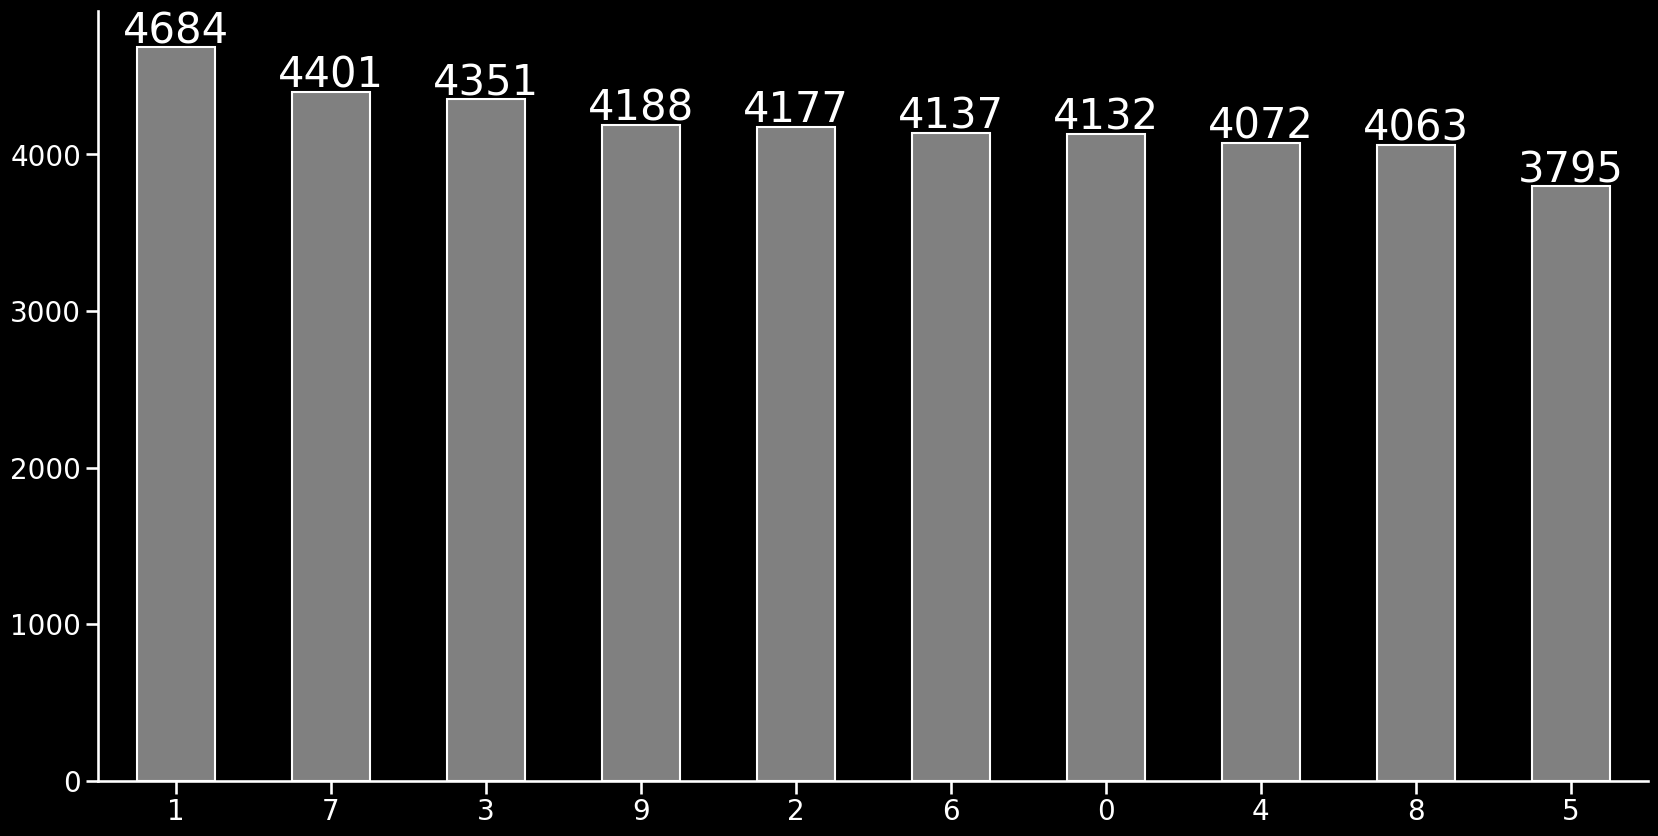

In [ ]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (20,10))
ax = train_y.value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 30, height, ha = 'center', size = 30)
sns.despine()

In [ ]:
!pip install pycaret

In [ ]:
!pip uninstall scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.10.1


In [ ]:
!pip install scipy==1.10.1

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)


##Anomaly Detection

In [ ]:
import pycaret
from pycaret.anomaly import *
pycaret.anomaly.setup(
    data=train_df)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d8154343370>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


,Description,Value
0,Session id,8888
1,Original data shape,"(42000, 785)"
2,Transformed data shape,"(42000, 785)"
3,Numeric features,785
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
pca = pycaret.anomaly.create_model('pca')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
pca_df = pycaret.anomaly.assign_model(pca)

In [ ]:
abnormal_data = pca_df[pca_df.Anomaly == 1].sort_values(by='Anomaly_Score', ascending=False)
print("the size of anomaly = ",len(abnormal_data))
abnormal_data.head(10).style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

the size of anomaly =  2100


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324


There are 2100 anomalies.
In the last column, there is an anomaly score.

In [ ]:
top10 = abnormal_data.drop('label',axis=1)[:10]
top10 = top10.loc[:,:'pixel783']

In [ ]:
fig = plt.figure(figsize=(25, 4))
img = np.array(top10).reshape(-1, 28, 28)
fig = px.imshow(img,color_continuous_scale='Blues_r',facet_col=0, binary_string=True, facet_col_wrap=5,labels={'facet_col':'img'})
fig.show()

<Figure size 2500x400 with 0 Axes>

Among the outliers, there are pictures that are confusing even with our eyes when looking at the pictures drawn by selecting the top 10 by sorting based on the value of the largest abnormal score.

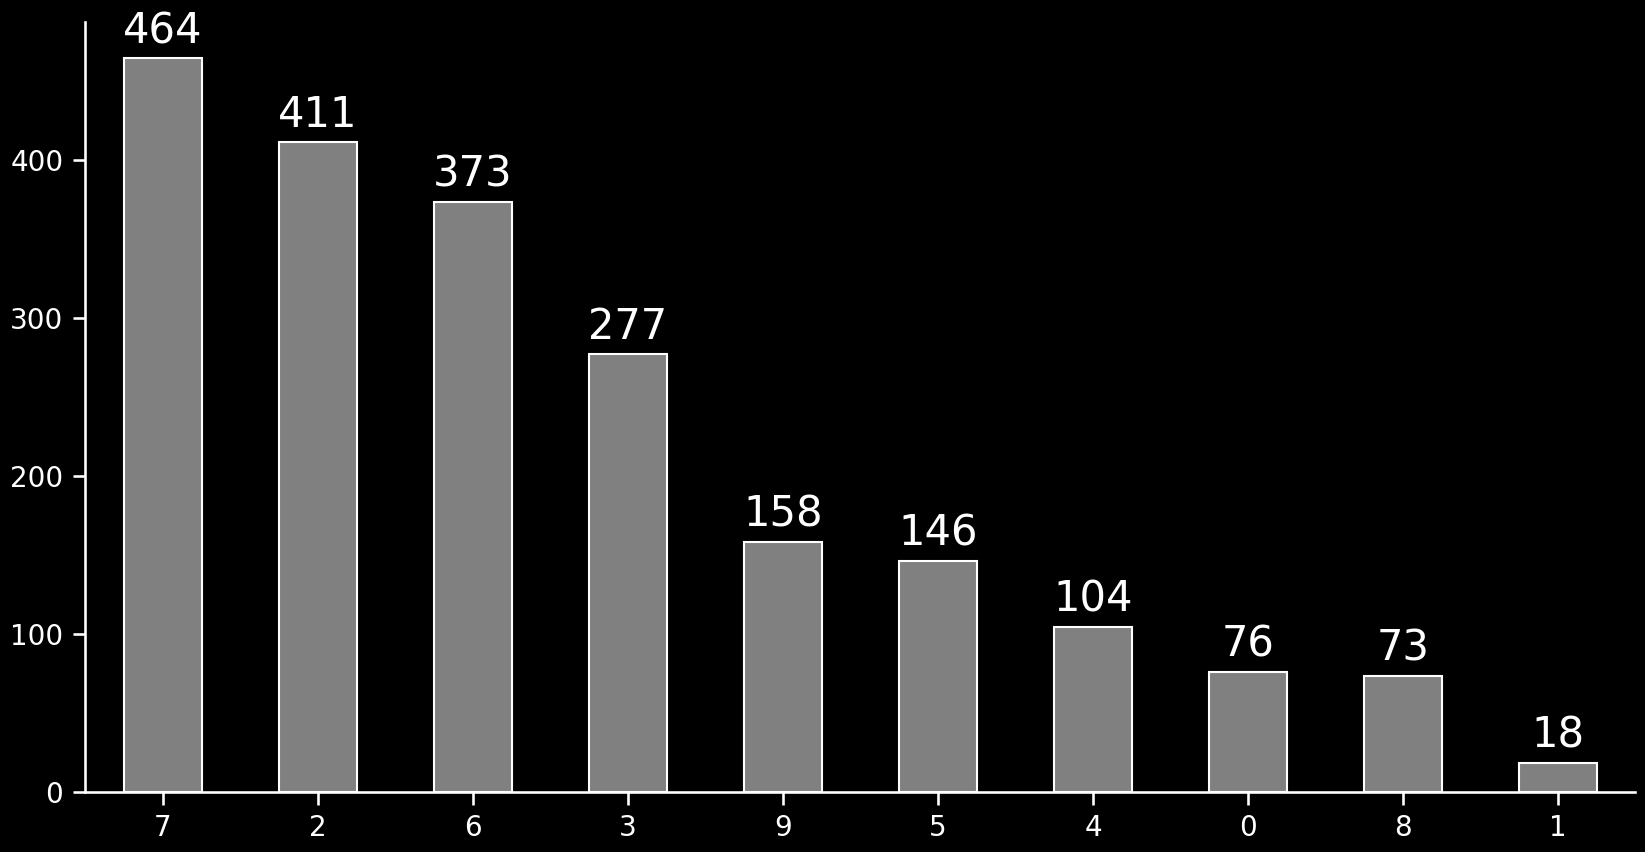

In [ ]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (20,10))
ax = abnormal_data.label.value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 10, height, ha = 'center', size = 30)
sns.despine()

A lot of outliers are seen in the numbers 7, 2, and 6.
Numbers of 1 seem to have the fewest outliers.

In [ ]:
fig = plt.figure(figsize=(25, 4))
img = np.array(train_x.sample(8)).reshape(-1, 28, 28)
fig = px.imshow(img,facet_col=0, binary_string=True, facet_col_wrap=4,labels={'facet_col':'img'})
fig.show()

<Figure size 2500x400 with 0 Axes>

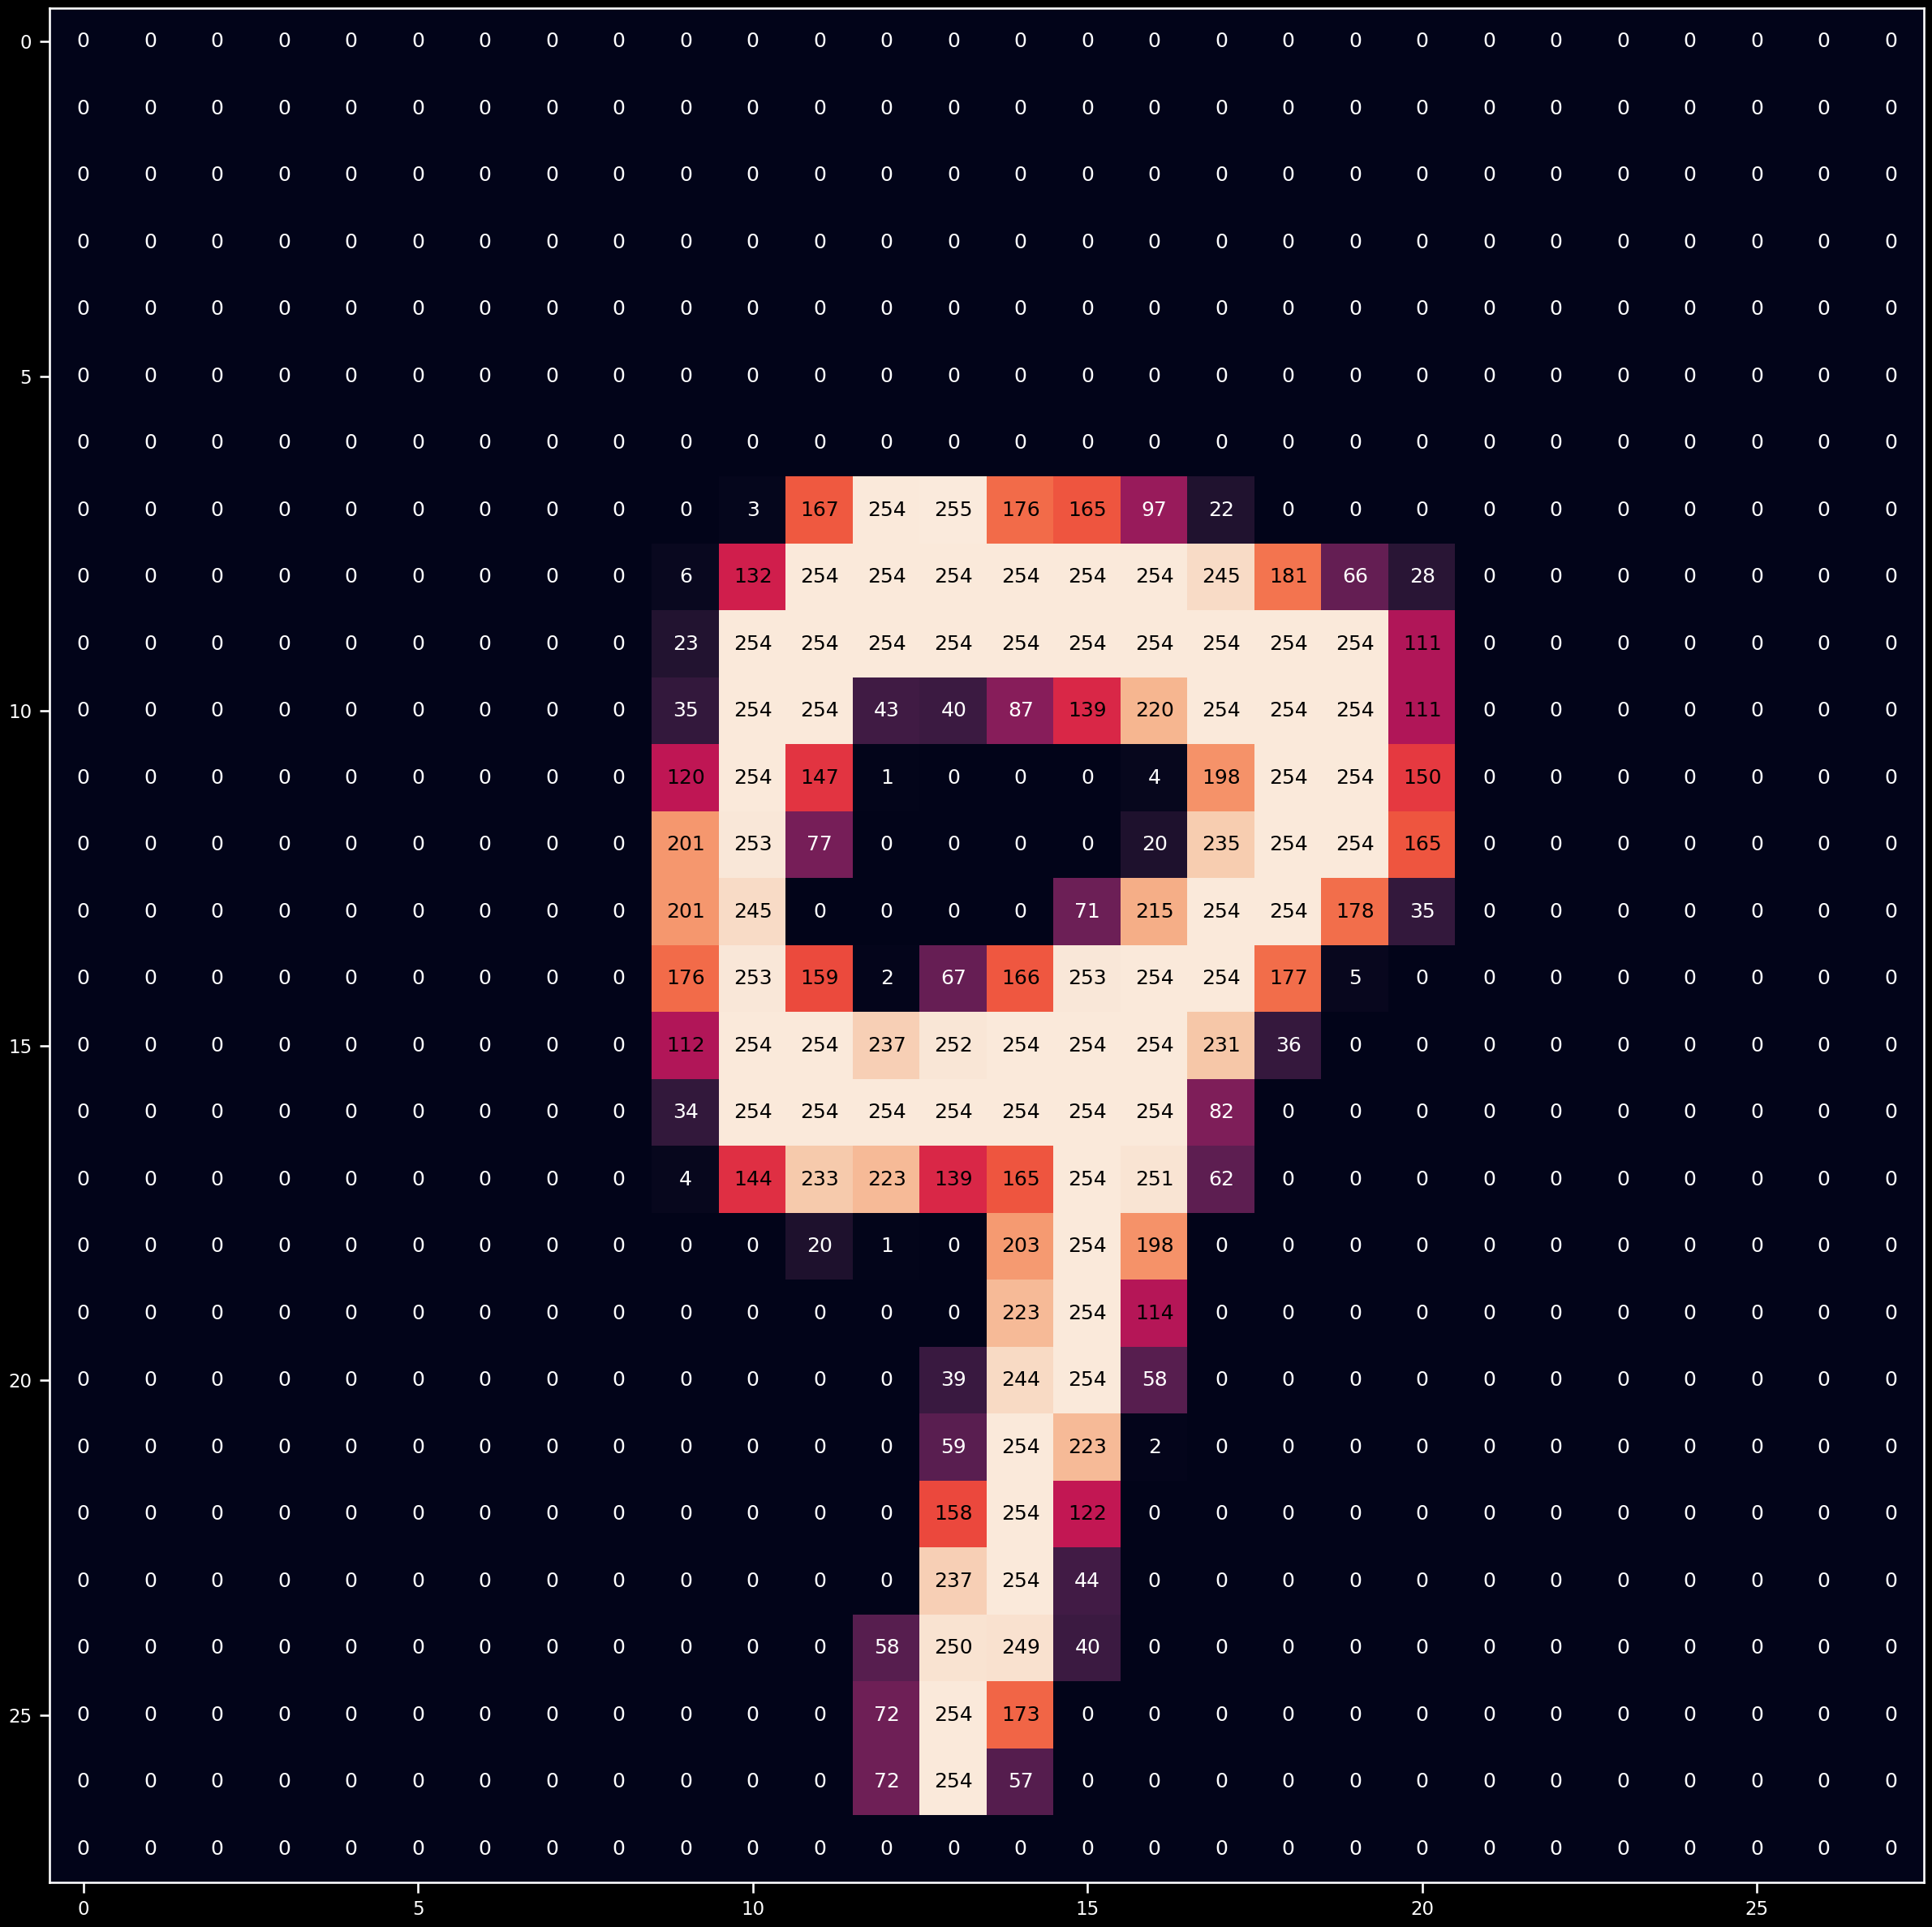

In [ ]:
img = np.array(train_x.sample(1))[0].reshape( 28, 28)
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(111)
ax.imshow(img)
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [ ]:
print(train_x.shape)

sample_size = 5000

train_x = pd.DataFrame(train_x[:sample_size])
train_y = train_y[:sample_size]

(42000, 784)


##Principal component analysis

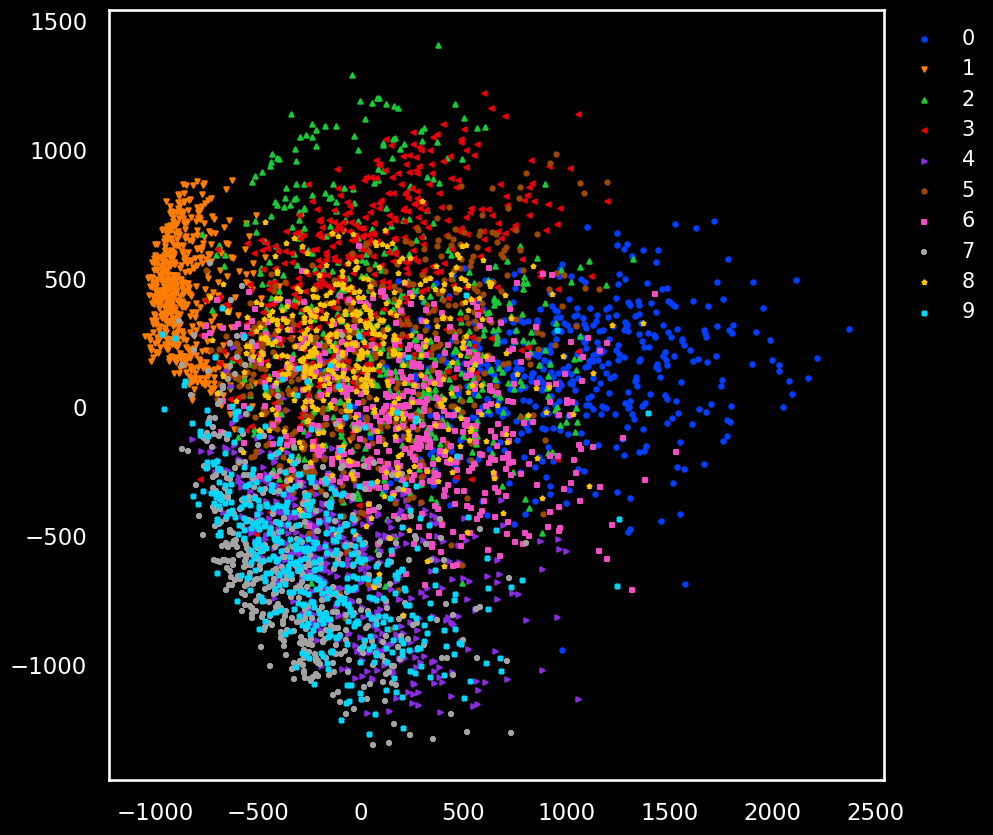

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
sns.set(style="white", context="talk",font_scale = 1)
plt.style.use("dark_background")
sns.set_palette("bright")
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

In [ ]:
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(train_x)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(train_y,name='label')
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1)
fig.show()

<class 'numpy.ndarray'>


#Deep Learning Pipeline

In [ ]:
import numpy as np
import pandas as pd
import struct
from array import array
import os


In [ ]:
training_images_filepath = '/content/drive/MyDrive/MNIST/train-images.idx3-ubyte'
training_labels_filepath = '/content/drive/MyDrive/MNIST/train-labels.idx1-ubyte'
test_images_filepath = '/content/drive/MyDrive/MNIST/t10k-images.idx3-ubyte'
test_labels_filepath = '/content/drive/MyDrive/MNIST/t10k-labels.idx1-ubyte'

In [ ]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return np.array(images), np.array(labels)

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [ ]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [ ]:
x_train = x_train/255.
x_test = x_test/255.

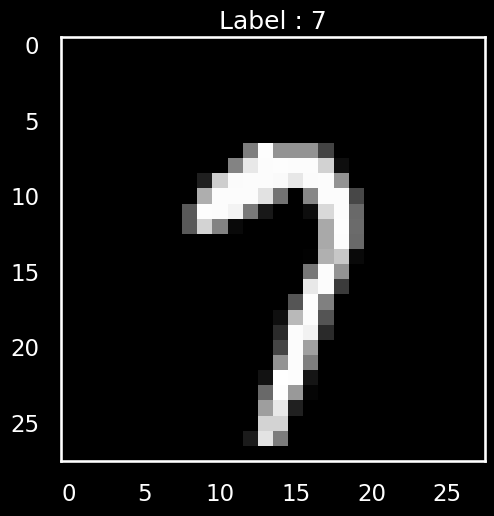

In [ ]:
import matplotlib.pyplot as pt
for i in range(10):
    r = np.random.randint(60000)
    pt.imshow(x_train[r], cmap = pt.cm.gray)
    pt.title("Label : "+str(y_train[r]))

In [ ]:
from keras.utils import to_categorical
x_train = np.array([x.flatten() for x in x_train])
y_train = np.array([to_categorical(y, 10) for y in y_train])
x_test = np.array([x.flatten() for x in x_test])
y_test = np.array([to_categorical(y, 10) for y in y_test])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout

model = Sequential()
model.add(Convolution2D(128, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Convolution2D(64, kernel_size = (3, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    callbacks=[early_stopping])


Epoch 1/10
1875/1875 [==============================] - 17s 6ms/step - loss: 0.2088 - accuracy: 0.9372 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0717 - accuracy: 0.9798 - val_loss: 0.0353 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.0345 - val_accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0431 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0334 - val_accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.0403 - val_ac

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
classification_rep = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



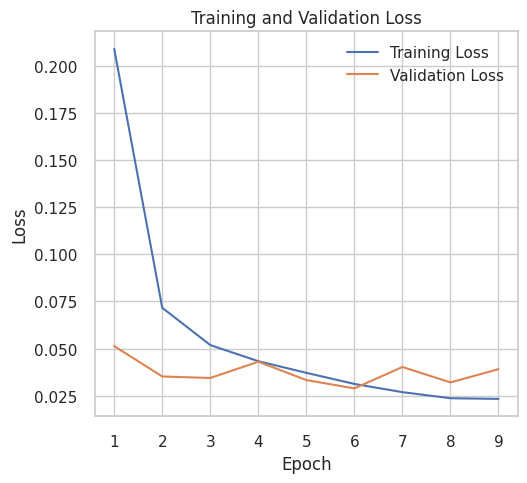

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

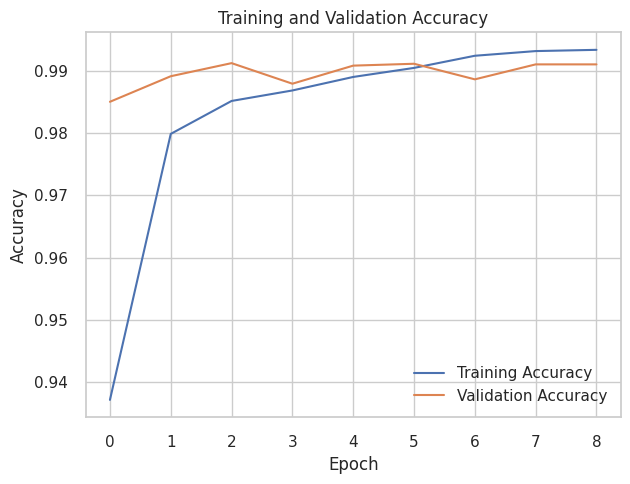

In [ ]:
# Training Accuracy vs. Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()